# Текст задания

1. Выполните поиск частых наборов объектов в трех различных наборах данных с помощью следующих алгоритмов (или их модификаций): Apriori, FP‑Growth, ECLAT. Наборы данных должны существенно отличаться друг от друга по количеству транзакций и/или типичной длине транзакции (количеству объектов). Варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%, 20%). Проверьте идентичность результатов, полученных с помощью различных алгоритмов.

2. Подготовьте список частых наборов, в которых не более семи объектов (разумное количество). Проанализируйте и изложите содержательный смысл полученного результата.

3. Выполните визуализацию полученных результатов в виде следующих диаграмм: 
 + сравнение быстродействия алгоритмов на фиксированном наборе данных при изменяемом пороге поддержки; 
 + общее количество частых наборов объектов на фиксированном наборе данных при изменяемом пороге поддержки; 
 + максимальная длина частого набора объектов на фиксированном наборе данных при изменяемом пороге поддержки; 
 + количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.

4. Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:  
 + формулировка задания; 
 + гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
  + рисунки с результатами визуализации; 
  + пояснения, раскрывающие смысл полученных результатов.

# Импорты

In [59]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
!pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import pandas as pd
import numpy as np
from apyori import apriori
from apyori import load_transactions
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from pyECLAT import ECLAT
import matplotlib.pyplot as plt

# Загрузка данных

In [64]:
with open('Market_Basket_Optimisation.csv') as file:
    basket = list(load_transactions(file, delimiter=","))

with open('retail.dat') as file:
    retail = list(load_transactions(file, delimiter=" "))
# Удаляем пустые элементы
for transaction in retail:
    transaction.remove('')

with open('kosarak.dat') as file:
    kosarak = list(load_transactions(file, delimiter=" "))

Посмотрим на первые транзакции каждого набора данных и размеры наборов

In [65]:
for transaction in basket[:3]:
  print(transaction)
print(len(basket))

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
7501


In [66]:
for transaction in retail[:3]:
  print(transaction)
print(len(retail))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
['30', '31', '32']
['33', '34', '35']
88162


In [67]:
for transaction in kosarak[:3]:
  print(transaction)
print(len(kosarak))

['1', '2', '3']
['1']
['4', '5', '6', '7']
990002


# Пункт 1

## Проверим идентичность результатов, полученных с помощью разных алгоритмов, но с одинаковыми параметрами

### Apriori

In [86]:
# Запускает алгоритм apriori для указанного набора данных, и порога поддержки
# Возвращает датафрейм из частых наборов и соответствующих значений поддержки
def runApriori(data, min_supp):
  # Выполняем поиск частых наборов, представляем результат в виде датафрейма
  sets = pd.DataFrame(list(apriori(data, min_support = min_supp)))
  if len(sets != 0):
    # Удалим ненужные для задания данные
    sets = sets.drop(columns = ["ordered_statistics"], axis = 1)
  return sets

In [87]:
# Выполняем поиск частых наборов и отображаем их
sets_test_apriori = runApriori(basket, 0.15)
sets_test_apriori

,items,support
0,(chocolate),0.163845
1,(eggs),0.179709
2,(french fries),0.170911
3,(mineral water),0.238368
4,(spaghetti),0.174110


### FP‑Growth

In [70]:
# Запускает алгоритм FP Growth для указанного набора данных, и порога поддержки
# Возвращает датафрейм из частых наборов и соответствующих значений поддержки
def runFPG(data, min_supp):
  # Преобразуем данные в вид, с которым работает библиотека
  te = TransactionEncoder()
  te_ary = te.fit(data).transform(data)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  # Выполняем поиск частых наборов
  sets = fpgrowth(df, min_support=min_supp, use_colnames=True)
  # Вытащим наборы и поддержку
  sets = sets[["itemsets", "support"]]
  sets = sets.rename(columns = {'itemsets':'items'})
  return sets

In [71]:
# Выполняем поиск частых наборов и отображаем их
sets_test_FP_Growth = runFPG(basket, 0.15)
sets_test_FP_Growth

,items,support
0,(mineral water),0.238368
1,(eggs),0.179709
2,(french fries),0.170911
3,(spaghetti),0.174110
4,(chocolate),0.163845


### Eclat

In [72]:
# Запускает алгоритм ECLAT для указанного набора данных, и порога поддержки
# Возвращает датафрейм из частых наборов и соответствующих значений поддержки
def runEclat(data, min_supp):
  # Преобразуем данные в вид, с которым работает библиотека
  data_to_eclat = pd.DataFrame(data)
  # Выполняем поиск частых наборов, представляем результат в виде датафрейма
  eclat_instance = ECLAT(data=data_to_eclat)
  get_ECLAT_indexes, sets = eclat_instance.fit(min_support=min_supp, verbose=False, separator=',')

  support = []
  items = list(sets)
  for key in items:
    support.append(sets[key])
  # Преобразуем наборы из строк в кортежи
  items = [tuple(item.split(',')) for item in items]

  sets = pd.DataFrame()
  sets["items"] = items
  sets["support"] = support
  return sets

In [73]:
# Выполняем поиск частых наборов и отображаем их
sets_test_Eclat = runEclat(basket, 0.15)
sets_test_Eclat

,items,support
0,"(eggs,)",0.179709
1,"(french fries,)",0.170911
2,"(spaghetti,)",0.174110
3,"(chocolate,)",0.163845
4,"(mineral water,)",0.238368


## Вывод
Судя по результатам можно сказать, что все алгоритмы находят одни и те же наборы при одинаковом минимальном значении поддержки

## Выполним поиск частых наборов в трех наборах данных с помощью разных алгоритмов для каждого, будем варьировать значение поддержки.

Также заранее вычислим на фиксированном наборе данных (basket) результаты всех алгоритмов при данных значениях поддержки

In [74]:
from time import time

# Запустим каждый алгоритм несколько раз на разных датасетах, и на фиксированном, варьируя значение порога поддержки и замеряя время выполнения на фиксированном
# Результаты сохраним в один датафрейм
support_values = [0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
result = {}
for min_supp in support_values:
  result[min_supp] = {}
  kosarak_apriori = runApriori(kosarak, min_supp)
  retail_FPG = runFPG(retail, min_supp)

  start = time()
  basket_eclat = runEclat(basket, min_supp)
  end_eclat = time() - start

  start = time()
  basket_apriori = runApriori(basket, min_supp)
  end_apriori = time() - start

  start = time()
  basket_FPG = runFPG(basket, min_supp)
  end_FPG = time() - start

  result[min_supp]["time_apriori"] = end_apriori
  result[min_supp]["time_eclat"] = end_eclat
  result[min_supp]["time_FPG"] = end_FPG

  result[min_supp]["basket_apriori"] = basket_apriori
  result[min_supp]["basket_FPG"] = basket_FPG
  result[min_supp]["basket_eclat"] = basket_eclat
  result[min_supp]["retail_FPG"] = retail_FPG
  result[min_supp]["kosarak_apriori"] = kosarak_apriori

# Пункт 2

In [75]:
# Подготовим списки частых наборов при минимальном значении поддержки 20%, в которых содержится не более 7 объектов для каждого набора данных
# Удалим наборы с числом объектов более 7
kosarak_res = result[0.2]["kosarak_apriori"]
basket_res = result[0.2]["basket_eclat"]
retail_res = result[0.2]["retail_FPG"]

drop_ixs = []
for i in range(len(kosarak_res)):
  if (len(kosarak_res.iloc[i]["items"]) > 7):
    drop_ixs.append(i)
kosarak_res = kosarak_res.drop(labels = drop_ixs, axis = 0)

drop_ixs = []
for i in range(len(retail_res)):
  if (len(retail_res.iloc[i]["items"]) > 7):
    drop_ixs.append(i)
retail_res = retail_res.drop(labels = drop_ixs, axis = 0)

drop_ixs = []
for i in range(len(basket_res)):
  if (len(basket_res.iloc[i]["items"]) > 7):
    drop_ixs.append(i)
basket_res = basket_res.drop(labels = drop_ixs, axis = 0)

In [76]:
kosarak_res

,items,support
0,(11),0.367742
1,(3),0.454576
2,(6),0.607447
3,"(11, 6)",0.327285
4,"(3, 6)",0.267858


In [77]:
retail_res

,items,support
0,(39),0.574794
1,(48),0.477927
2,"(48, 39)",0.330551


In [78]:
basket_res

,items,support
0,"(mineral water,)",0.238368


# Пункт 3

In [79]:
# Визуализация
def draw(dataX, dataY1, dataY2, dataY3, labelX, labelY):
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 5, 1)
    plt.title("Apriori")
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.plot(dataX, dataY1)
    plt.xticks(np.arange(0, 1.1, 0.2))

    plt.subplot(1, 5, 3)
    plt.title("FP-Growth")
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.plot(dataX, dataY2)
    plt.xticks(np.arange(0, 1.1, 0.2))

    plt.subplot(1, 5, 5)
    plt.title("Eclat")
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.plot(dataX, dataY3)
    plt.xticks(np.arange(0, 1.1, 0.2))

    plt.show()

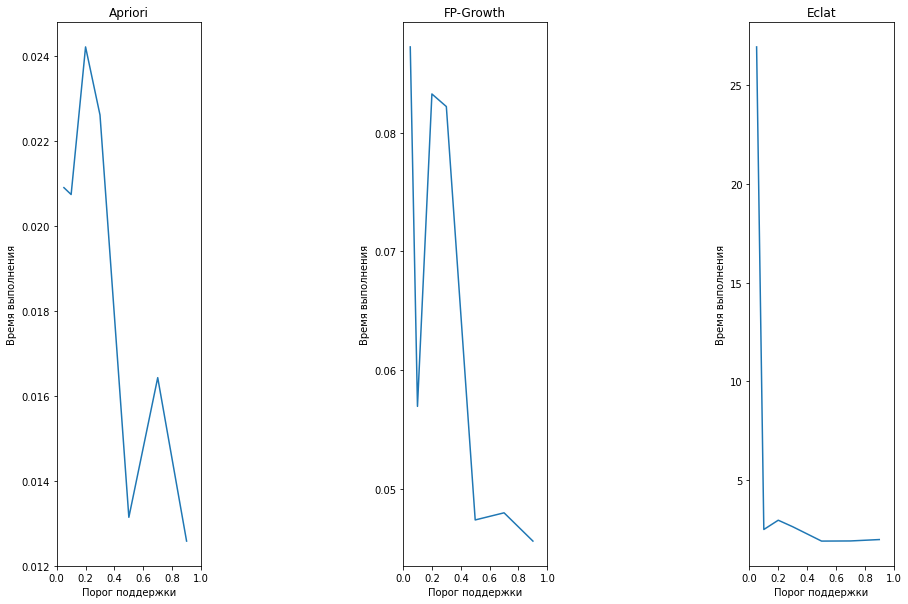

In [80]:
# сравнение быстродействия алгоритмов на фиксированном наборе данных при изменяемом пороге поддержки
dataX = support_values
dataY1 = np.array([result[supp]["time_apriori"] for supp in support_values])
dataY2 = np.array([result[supp]["time_FPG"] for supp in support_values])
dataY3 = np.array([result[supp]["time_eclat"] for supp in support_values])
draw(dataX, dataY1, dataY2, dataY3, "Порог поддержки", "Время выполнения")

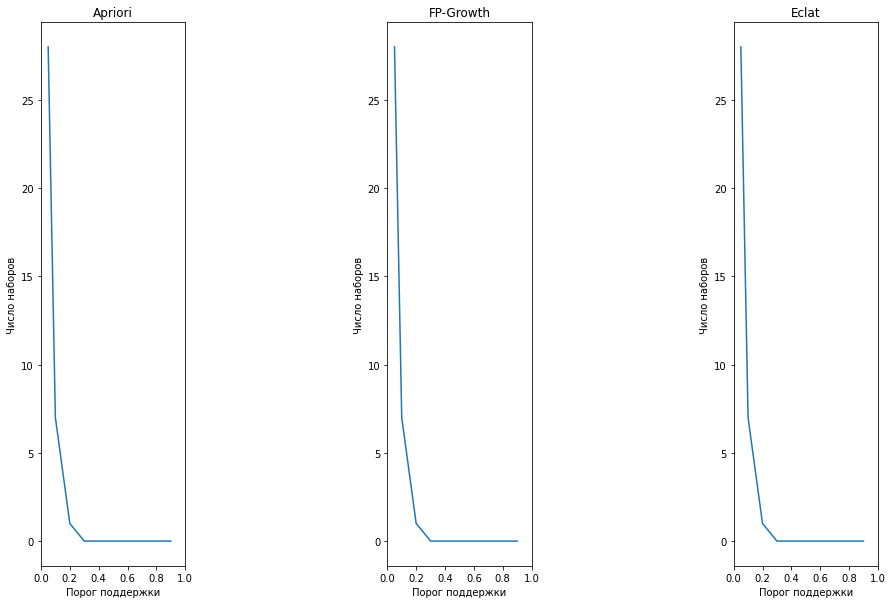

In [81]:
# общее количество частых наборов объектов на фиксированном наборе данных при изменяемом пороге поддержки
dataX = support_values
dataY1 = np.array([len(result[supp]["basket_apriori"]) for supp in support_values])
dataY2 = np.array([len(result[supp]["basket_FPG"]) for supp in support_values])
dataY3 = np.array([len(result[supp]["basket_eclat"]) for supp in support_values])
draw(dataX, dataY1, dataY2, dataY3, "Порог поддержки", "Число наборов")

In [82]:
# Возвращает максимальную длину частого набора в датасете
def calculateMaxSetLength(sets):
  res = 0
  for i in range(len(sets)):
    current_length = len(sets.iloc[i]["items"])
    if (current_length > res):
      res = current_length
  return res

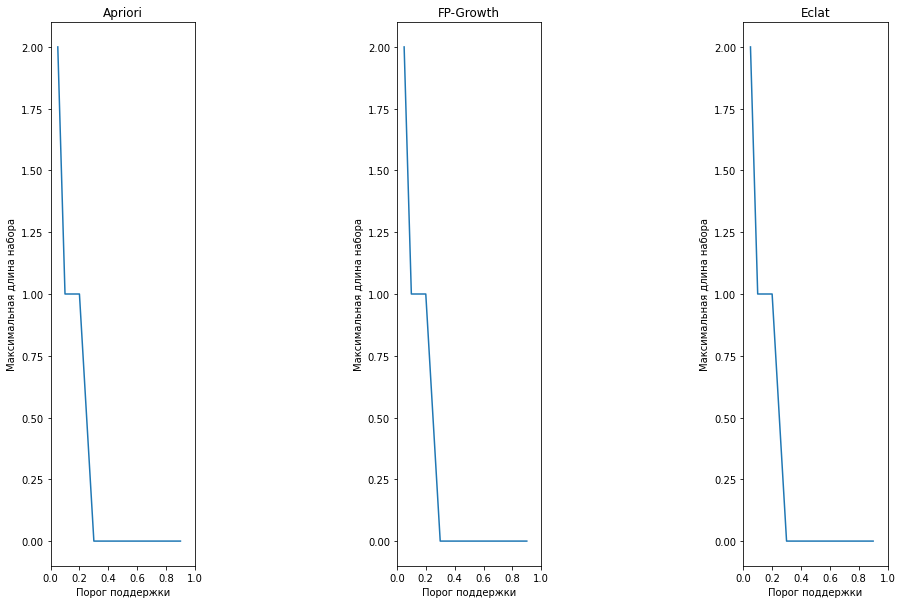

In [83]:
# максимальная длина частого набора объектов на фиксированном наборе данных при изменяемом пороге поддержки
dataX = support_values
dataY1 = np.array([calculateMaxSetLength(result[supp]["basket_apriori"]) for supp in support_values])
dataY2 = np.array([calculateMaxSetLength(result[supp]["basket_FPG"]) for supp in support_values])
dataY3 = np.array([calculateMaxSetLength(result[supp]["basket_eclat"]) for supp in support_values])
draw(dataX, dataY1, dataY2, dataY3, "Порог поддержки", "Максимальная длина набора")

In [84]:
# Возвращает количество частых наборов объектов различной длины в датасете
def calculateCountSetsDiffLength(sets):
  count = 0
  lengths = []
  for i in range(len(sets)):
    current_length = len(sets.iloc[i]["items"])
    if not (current_length in lengths):
      count += 1
      lengths.append(current_length)
  return count

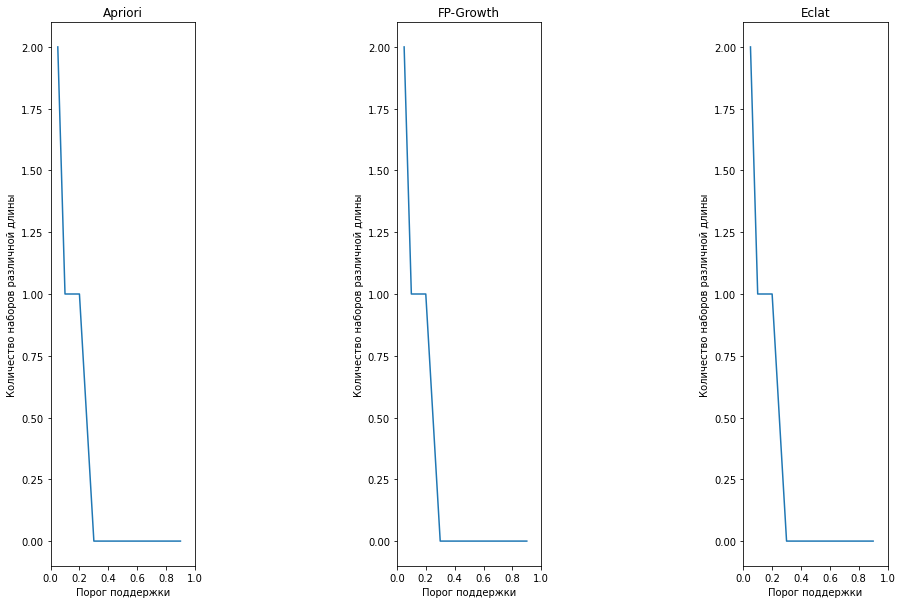

In [85]:
# количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки
dataX = support_values
dataY1 = np.array([calculateCountSetsDiffLength(result[supp]["basket_apriori"]) for supp in support_values])
dataY2 = np.array([calculateCountSetsDiffLength(result[supp]["basket_FPG"]) for supp in support_values])
dataY3 = np.array([calculateCountSetsDiffLength(result[supp]["basket_eclat"]) for supp in support_values])
draw(dataX, dataY1, dataY2, dataY3, "Порог поддержки", "Количество наборов различной длины")